In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
pwd

'C:\\Users\\Lenovo\\INTERN_CHF'

In [8]:
path = "C:\\Users\\Lenovo\\INTERN_CHF"
files = [file for file in os.listdir(path) if file.endswith('.csv')]

all_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(os.path.join(path, file))
    # Add a new column with the file name
    current_data['Source_File'] = file
    all_data = pd.concat([all_data, current_data], ignore_index=True)

all_data.to_csv("all_data.csv", index=False)


In [3]:
all_data=pd.read_csv("all_data.csv")

In [4]:
all_data.head()

time      open      high       low     close           Source_File
0  989910000  0.839019  0.839019  0.827202  0.831220  EGX_DLY_COMI, 1D.csv
1  989996400  0.827202  0.836419  0.823184  0.826020  EGX_DLY_COMI, 1D.csv
2  990082800  0.827202  0.827202  0.820111  0.824366  EGX_DLY_COMI, 1D.csv
3  990342000  0.815621  0.821293  0.815385  0.816566  EGX_DLY_COMI, 1D.csv
4  990428400  0.813257  0.850836  0.809476  0.831456  EGX_DLY_COMI, 1D.csv

In [38]:
all_data.describe()

time          open          high           low         close
count  1.264000e+04  12640.000000  12640.000000  12640.000000  12640.000000
mean   1.453680e+09   2825.761692   2846.906060   2808.007666   2827.060045
std    1.882462e+08   5150.901450   5192.226783   5116.915050   5154.221037
min    9.899100e+08      0.602676      0.602676      0.600312      0.602203
25%    1.329185e+09      3.050000      3.110000      2.990000      3.050000
50%    1.499674e+09      7.634414      7.735757      7.483705      7.628033
75%    1.606054e+09   5116.934937   5146.237304   5073.094849   5116.734985
max    1.707984e+09  30431.301000  30696.000000  29193.900000  30347.301000

In [39]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12640 entries, 0 to 12639
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         12640 non-null  int64  
 1   open         12640 non-null  float64
 2   high         12640 non-null  float64
 3   low          12640 non-null  float64
 4   close        12640 non-null  float64
 5   Source_File  12640 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 592.6+ KB


In [40]:
all_data.isnull().sum()

time           0
open           0
high           0
low            0
close          0
Source_File    0
dtype: int64

In [41]:
import pandas as pd

# Assuming all_data is a Pandas DataFrame with a column 'time'
all_data['date'] = pd.to_datetime(all_data['time'], unit='s')
# Display the enhanced DataFrame
print("Enhanced Time Format:")
print(all_data[['time', 'date']])


Enhanced Time Format:
             time                date
0       989910000 2001-05-15 07:00:00
1       989996400 2001-05-16 07:00:00
2       990082800 2001-05-17 07:00:00
3       990342000 2001-05-20 07:00:00
4       990428400 2001-05-21 07:00:00
...           ...                 ...
12635  1707638400 2024-02-11 08:00:00
12636  1707724800 2024-02-12 08:00:00
12637  1707811200 2024-02-13 08:00:00
12638  1707897600 2024-02-14 08:00:00
12639  1707984000 2024-02-15 08:00:00

[12640 rows x 2 columns]


In [42]:
all_data.sort_values(by='date', inplace=True)
all_data.head()

time      open      high       low     close           Source_File  \
0  989910000  0.839019  0.839019  0.827202  0.831220  EGX_DLY_COMI, 1D.csv   
1  989996400  0.827202  0.836419  0.823184  0.826020  EGX_DLY_COMI, 1D.csv   
2  990082800  0.827202  0.827202  0.820111  0.824366  EGX_DLY_COMI, 1D.csv   
3  990342000  0.815621  0.821293  0.815385  0.816566  EGX_DLY_COMI, 1D.csv   
4  990428400  0.813257  0.850836  0.809476  0.831456  EGX_DLY_COMI, 1D.csv   

                 date  
0 2001-05-15 07:00:00  
1 2001-05-16 07:00:00  
2 2001-05-17 07:00:00  
3 2001-05-20 07:00:00  
4 2001-05-21 07:00:00

In [43]:
# Print starting and ending dates
print("Starting date: ", all_data['date'].iloc[0])
print("Ending date: ", all_data['date'].iloc[-1])

# Calculate duration
duration = all_data['date'].iloc[-1] - all_data['date'].iloc[0]
print("Duration: ", duration)


Starting date:  2001-05-15 07:00:00
Ending date:  2024-02-15 08:00:00
Duration:  8311 days 01:00:00


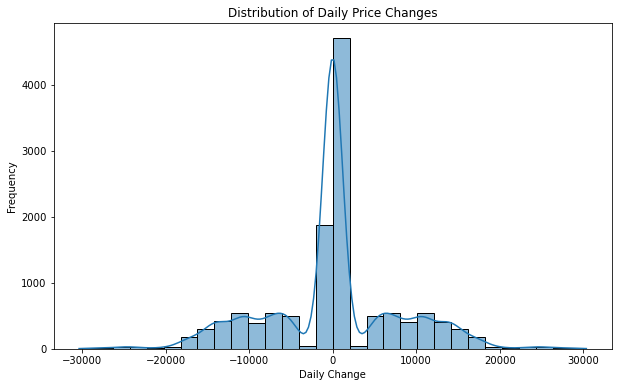

In [44]:
all_data['Daily Change'] = all_data['close'].diff()
# Plotting a histogram of daily price changes
all_data['Daily Change'] 
plt.figure(figsize=(10, 6))
sns.histplot(all_data['Daily Change'], bins=30, kde=True)
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Daily Change')
plt.ylabel('Frequency')
plt.show()


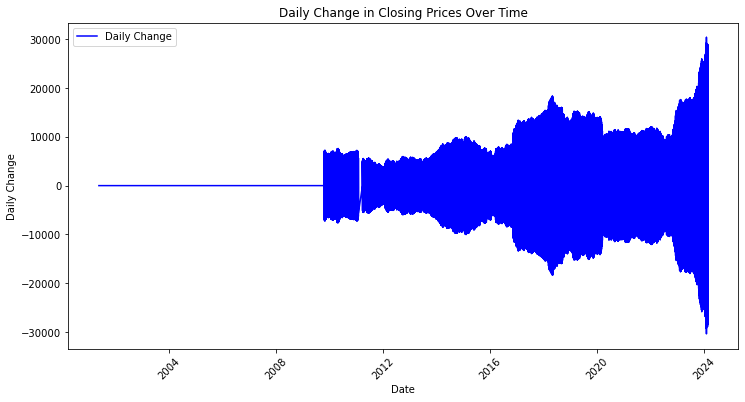

In [45]:
# Plotting the 'Daily Change' over time
plt.figure(figsize=(12, 6))
plt.plot(all_data['date'], all_data['Daily Change'], label='Daily Change', color='blue')
plt.title('Daily Change in Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [46]:
monthvise= all_data.groupby(all_data['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

open        close
date                               
January    3115.391613  3120.815919
February   3070.687893  3071.195414
March      2772.469095  2771.187425
April      2761.547724  2764.656966
May        2783.726494  2779.970503
June       2603.849819  2601.296926
July       2607.281692  2608.103092
August     2663.070563  2667.292608
September  2706.203272  2705.164127
October    2819.687877  2823.230252
November   2992.346397  2995.944407
December   2984.402324  2986.953589

In [47]:
all_data.rename(columns={'Source_File': 'company'}, inplace=True)
all_data.head()

time      open      high       low     close               company  \
0  989910000  0.839019  0.839019  0.827202  0.831220  EGX_DLY_COMI, 1D.csv   
1  989996400  0.827202  0.836419  0.823184  0.826020  EGX_DLY_COMI, 1D.csv   
2  990082800  0.827202  0.827202  0.820111  0.824366  EGX_DLY_COMI, 1D.csv   
3  990342000  0.815621  0.821293  0.815385  0.816566  EGX_DLY_COMI, 1D.csv   
4  990428400  0.813257  0.850836  0.809476  0.831456  EGX_DLY_COMI, 1D.csv   

                 date  Daily Change  
0 2001-05-15 07:00:00           NaN  
1 2001-05-16 07:00:00     -0.005199  
2 2001-05-17 07:00:00     -0.001654  
3 2001-05-20 07:00:00     -0.007799  
4 2001-05-21 07:00:00      0.014890

In [48]:
# Mapping values in the 'Source_File' column
all_data['company'] = all_data['company'].replace({'EGX_DLY_COMI, 1D.csv': 'A',"EGX_DLY_EGX30, 1D.csv":'B',
                                                           "EGX_DLY_EMFD, 1D.csv": 'C',"EGX_DLY_ISPH, 1D.csv": 'D'
                                                          })


<AxesSubplot:>

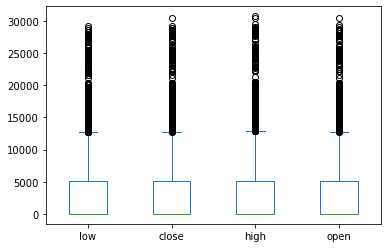

In [49]:
all_data[['low',"close",'high','open']].plot(kind='box')

In [50]:
company_data = all_data[all_data['company'] == 'D']

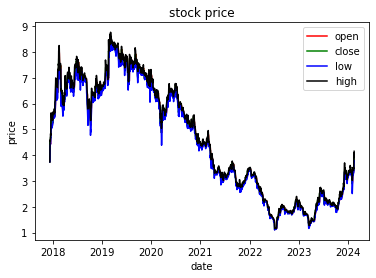

In [51]:
plt.plot(company_data['date'], company_data['open'].values, color='red', label='open')
plt.plot(company_data['date'], company_data['close'].values, color='green', label='close')
plt.plot(company_data['date'], company_data['low'].values, color='blue', label='low')
plt.plot(company_data['date'], company_data['high'].values, color='black', label='high')
plt.title('stock price')
plt.xlabel('date')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

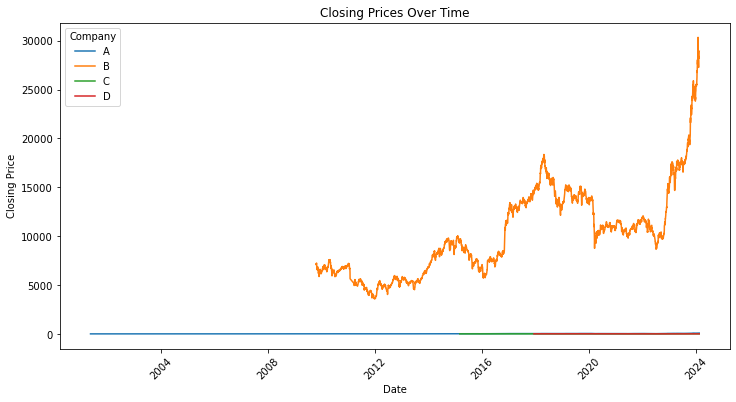

In [52]:
#all_data['date'] = pd.to_datetime(all_data['date'])
# Plotting the closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=all_data, hue="company")
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

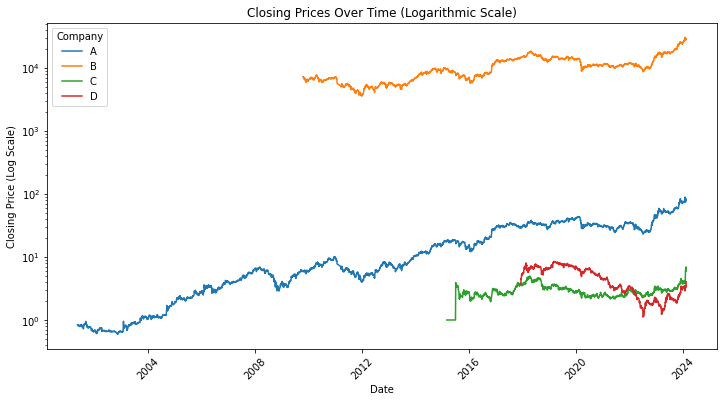

In [53]:
# Plotting the closing prices over time with a logarithmic y-axis scale
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=all_data, hue="company")
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Closing Prices Over Time (Logarithmic Scale)')
plt.xlabel('Date')
plt.ylabel('Closing Price (Log Scale)')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

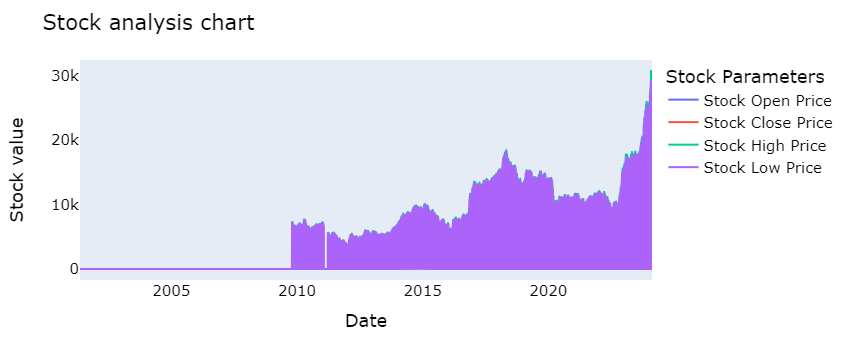

In [54]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(all_data, x=all_data.date, y=[all_data['open'], all_data['close'], 
                                          all_data['high'], all_data['low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [55]:
all_data.head()

time      open      high       low     close company  \
0  989910000  0.839019  0.839019  0.827202  0.831220       A   
1  989996400  0.827202  0.836419  0.823184  0.826020       A   
2  990082800  0.827202  0.827202  0.820111  0.824366       A   
3  990342000  0.815621  0.821293  0.815385  0.816566       A   
4  990428400  0.813257  0.850836  0.809476  0.831456       A   

                 date  Daily Change  
0 2001-05-15 07:00:00           NaN  
1 2001-05-16 07:00:00     -0.005199  
2 2001-05-17 07:00:00     -0.001654  
3 2001-05-20 07:00:00     -0.007799  
4 2001-05-21 07:00:00      0.014890

In [56]:
all_data.drop(["time"], axis=1, inplace=True)
all_data.isnull().sum()

open            0
high            0
low             0
close           0
company         0
date            0
Daily Change    1
dtype: int64

In [57]:
#all_data[all_data['Daily Change']].dropna()

In [58]:
all_data.head()

open      high       low     close company                date  \
0  0.839019  0.839019  0.827202  0.831220       A 2001-05-15 07:00:00   
1  0.827202  0.836419  0.823184  0.826020       A 2001-05-16 07:00:00   
2  0.827202  0.827202  0.820111  0.824366       A 2001-05-17 07:00:00   
3  0.815621  0.821293  0.815385  0.816566       A 2001-05-20 07:00:00   
4  0.813257  0.850836  0.809476  0.831456       A 2001-05-21 07:00:00   

   Daily Change  
0           NaN  
1     -0.005199  
2     -0.001654  
3     -0.007799  
4      0.014890

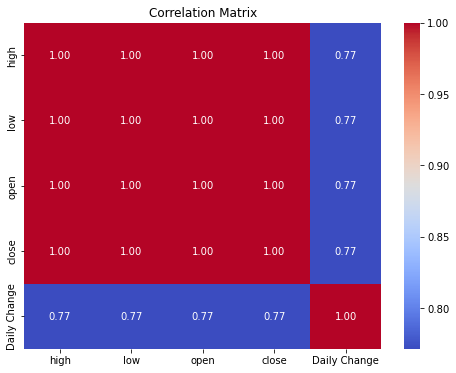

In [26]:
# Plotting a correlation matrix
correlation_matrix = all_data[['high', 'low', 'open', 'close','date','Daily Change']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

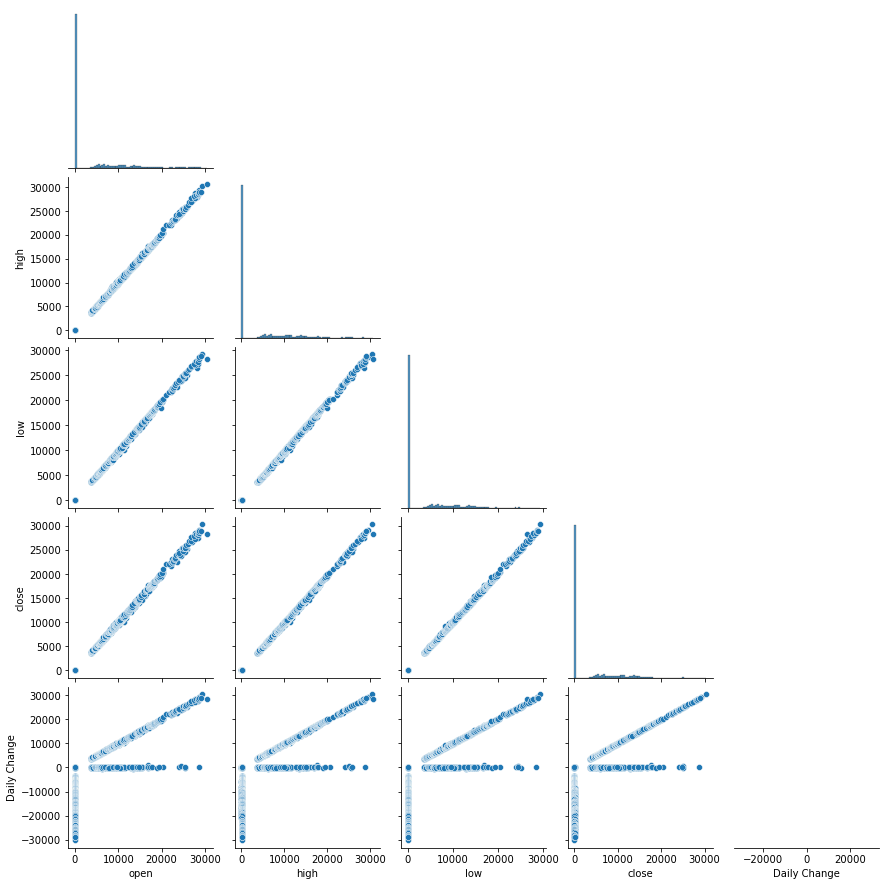

In [27]:
#we need to predict the closing price of the stock, lets us consider 'Close' feature as the Target variable. 
sns.pairplot(all_data,corner=True)

In [28]:
all_data.corr()['close']

open            0.999882
high            0.999946
low             0.999948
close           1.000000
Daily Change    0.771585
Name: close, dtype: float64

In [30]:

# Iterate over unique companies
for company in all_data['company'].unique():
    # Filter data for the current company
    company_data = all_data[all_data['company'] == company]

    # Separate features (X) and target (y)
    X = company_data[['open', 'high', 'low']]
    y = company_data['close']


    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features if necessary (using MinMaxScaler in this example)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions on training set
    train_predictions = model.predict(X_train_scaled)

    # Evaluate the model on training set
    train_r2 = r2_score(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)

    # Make predictions on testing set
    test_predictions = model.predict(X_test_scaled)

    # Evaluate the model on testing set
    test_r2 = r2_score(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Display results
    print(f'Company: {company}')
    print(f'Training R-squared: {train_r2}')
    print(f'Training Mean Squared Error: {train_mse}')
    print(f'Testing R-squared: {test_r2}')
    print(f'Testing Mean Squared Error: {test_mse}')
    print()


Company: A
Training R-squared: 0.9998797426666785
Training Mean Squared Error: 0.03135856149135985
Testing R-squared: 0.999865467340215
Testing Mean Squared Error: 0.034386479505177446

Company: B
Training R-squared: 0.9998644342111844
Training Mean Squared Error: 2747.164153149549
Testing R-squared: 0.9997068536535202
Testing Mean Squared Error: 6062.225335698323

Company: C
Training R-squared: 0.9988621886992083
Training Mean Squared Error: 0.0005464228477773403
Testing R-squared: 0.9977175156252533
Testing Mean Squared Error: 0.0008770914281665733

Company: D
Training R-squared: 0.9995771142464923
Training Mean Squared Error: 0.0019576603821438703
Testing R-squared: 0.9995524077914703
Testing Mean Squared Error: 0.002150407114208884



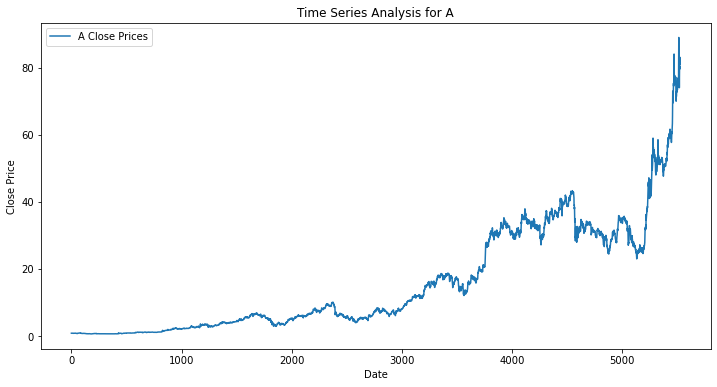

<Figure size 864x576 with 0 Axes>

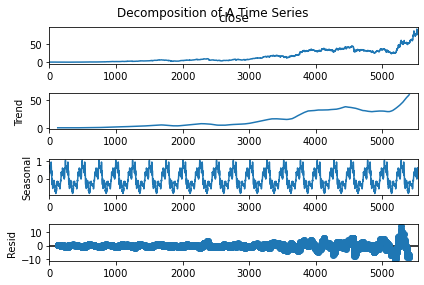

ADF Statistic for A: 3.03233203020133
p-value for A: 1.0
Critical Values: {'1%': -3.4315403851621102, '5%': -2.8620660319694364, '10%': -2.5670500056584755}


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



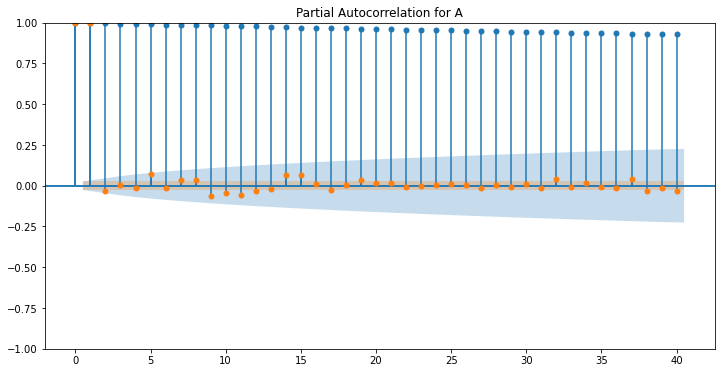

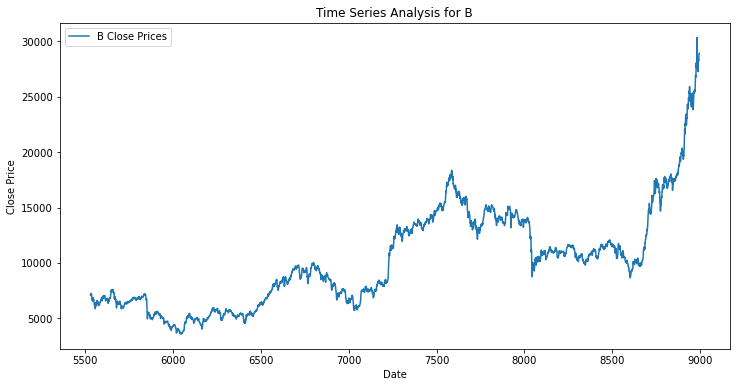

<Figure size 864x576 with 0 Axes>

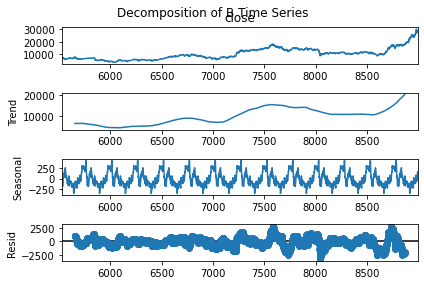

ADF Statistic for B: 1.906940333097906
p-value for B: 0.9985391035036633
Critical Values: {'1%': -3.4322512735387862, '5%': -2.8623800736427762, '10%': -2.567217186547151}


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



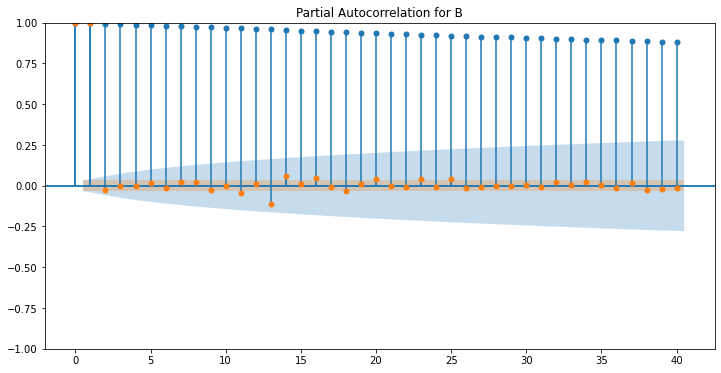

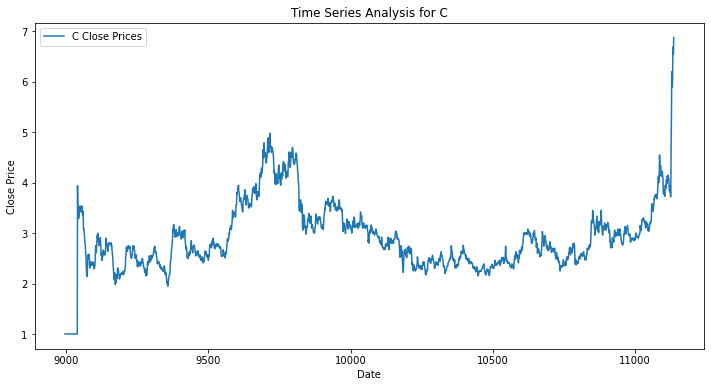

<Figure size 864x576 with 0 Axes>

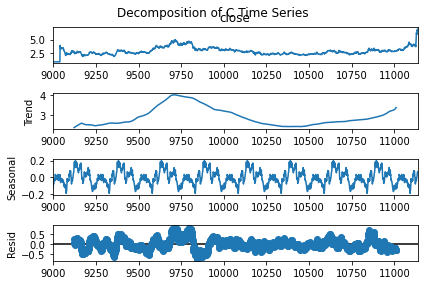

ADF Statistic for C: -1.4346953270022564
p-value for C: 0.5655344124209762
Critical Values: {'1%': -3.4334108531807006, '5%': -2.862892168387536, '10%': -2.5674898285322496}


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



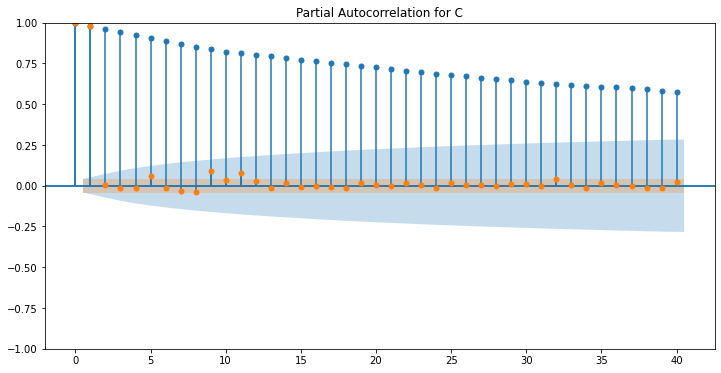

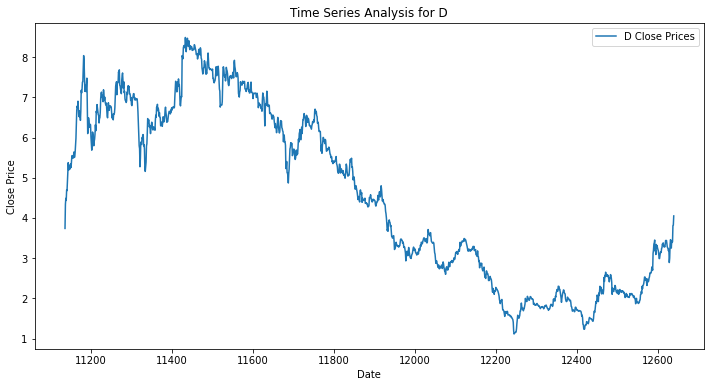

<Figure size 864x576 with 0 Axes>

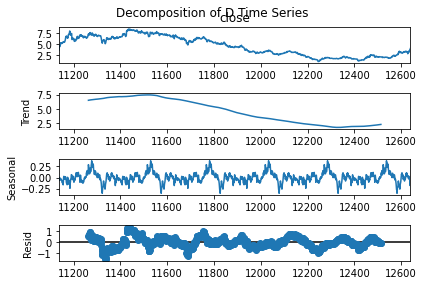

ADF Statistic for D: -0.9508828600084579
p-value for D: 0.7707547406168507
Critical Values: {'1%': -3.4347287139577753, '5%': -2.8634739225299133, '10%': -2.5677995973755325}


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



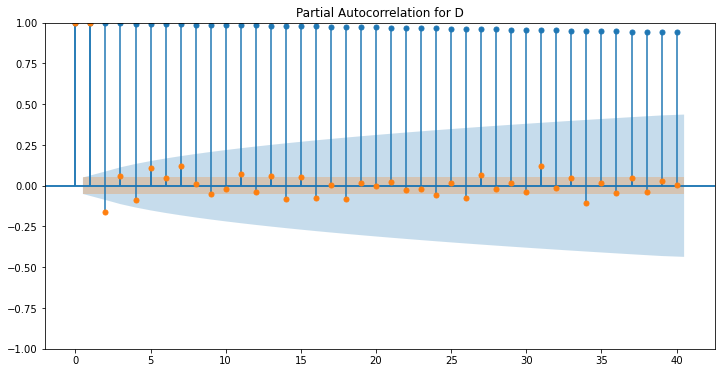

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

for company in all_data['company'].unique():
    # Filter data for the current company
    company_data = all_data[all_data['company'] == company]

    # Visualize the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(company_data['close'], label=f'{company} Close Prices')
    plt.title(f'Time Series Analysis for {company}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    # Decompose the time series into trend, seasonality, and residual components
    result = seasonal_decompose(company_data['close'], model='additive', period=252)  # Assuming daily data with 252 trading days per year

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))
    result.plot()
    plt.suptitle(f'Decomposition of {company} Time Series')
    plt.show()

    # Check for stationarity using Augmented Dickey-Fuller test
    adf_result = adfuller(company_data['close'])
    print(f'ADF Statistic for {company}: {adf_result[0]}')
    print(f'p-value for {company}: {adf_result[1]}')
    print('Critical Values:', adf_result[4])

    # If the p-value is less than 0.05, the time series is stationary

    # Autocorrelation and Partial Autocorrelation plots
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_acf(company_data['close'], lags=40, ax=ax, title=f'Autocorrelation for {company}')
    plot_pacf(company_data['close'], lags=40, ax=ax, title=f'Partial Autocorrelation for {company}')
    plt.show()


Epoch 1/50
172/172 [==============================] - 3s 6ms/step - loss: 0.0056
Epoch 2/50
172/172 [==============================] - 1s 5ms/step - loss: 8.4740e-05
Epoch 3/50
172/172 [==============================] - 1s 5ms/step - loss: 7.0521e-05
Epoch 4/50
172/172 [==============================] - 1s 5ms/step - loss: 7.3556e-05
Epoch 5/50
172/172 [==============================] - 1s 5ms/step - loss: 7.9509e-05
Epoch 6/50
172/172 [==============================] - 1s 5ms/step - loss: 7.2870e-05
Epoch 7/50
172/172 [==============================] - 1s 6ms/step - loss: 6.7489e-05
Epoch 8/50
172/172 [==============================] - 1s 6ms/step - loss: 6.4191e-05
Epoch 9/50
172/172 [==============================] - 1s 5ms/step - loss: 6.9765e-05
Epoch 10/50
172/172 [==============================] - 1s 5ms/step - loss: 5.6524e-05
Epoch 11/50
172/172 [==============================] - 1s 6ms/step - loss: 6.2017e-05
Epoch 12/50
172/172 [==============================] - 1s 6ms/step 

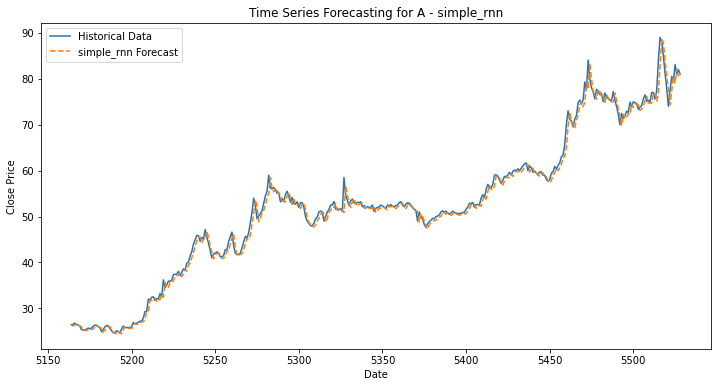

Epoch 1/50
172/172 [==============================] - 7s 17ms/step - loss: 0.0057
Epoch 2/50
172/172 [==============================] - 3s 17ms/step - loss: 1.3065e-04
Epoch 3/50
172/172 [==============================] - 4s 23ms/step - loss: 1.1787e-04
Epoch 4/50
172/172 [==============================] - 4s 21ms/step - loss: 1.0975e-04
Epoch 5/50
172/172 [==============================] - 3s 18ms/step - loss: 1.0781e-04
Epoch 6/50
172/172 [==============================] - 3s 16ms/step - loss: 1.0036e-04
Epoch 7/50
172/172 [==============================] - 3s 15ms/step - loss: 9.6293e-05
Epoch 8/50
172/172 [==============================] - 3s 15ms/step - loss: 9.6454e-05
Epoch 9/50
172/172 [==============================] - 3s 15ms/step - loss: 9.3877e-05
Epoch 10/50
172/172 [==============================] - 2s 14ms/step - loss: 8.9291e-05
Epoch 11/50
172/172 [==============================] - 2s 14ms/step - loss: 8.8859e-05
Epoch 12/50
172/172 [==============================] - 2

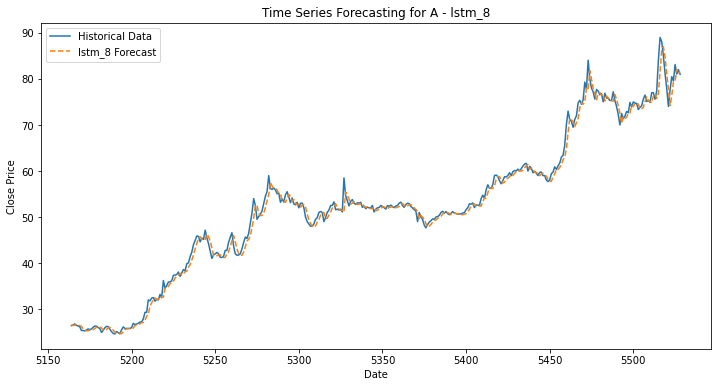

Epoch 1/50
172/172 [==============================] - 5s 13ms/step - loss: 0.0034
Epoch 2/50
172/172 [==============================] - 2s 13ms/step - loss: 5.1833e-05
Epoch 3/50
172/172 [==============================] - 2s 13ms/step - loss: 4.6600e-05
Epoch 4/50
172/172 [==============================] - 3s 16ms/step - loss: 4.6812e-05
Epoch 5/50
172/172 [==============================] - 2s 13ms/step - loss: 4.9278e-05
Epoch 6/50
172/172 [==============================] - 2s 14ms/step - loss: 4.1620e-05
Epoch 7/50
172/172 [==============================] - 2s 14ms/step - loss: 4.0745e-05
Epoch 8/50
172/172 [==============================] - 2s 14ms/step - loss: 4.1377e-05
Epoch 9/50
172/172 [==============================] - 2s 14ms/step - loss: 4.3171e-05
Epoch 10/50
172/172 [==============================] - 2s 14ms/step - loss: 3.6600e-05
Epoch 11/50
172/172 [==============================] - 2s 13ms/step - loss: 3.6056e-05
Epoch 12/50
172/172 [==============================] - 2

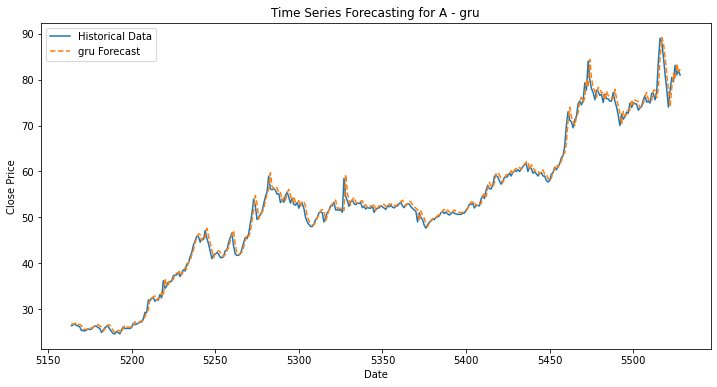

Epoch 1/50
108/108 [==============================] - 2s 5ms/step - loss: 0.0013
Epoch 2/50
108/108 [==============================] - 1s 5ms/step - loss: 4.3751e-05
Epoch 3/50
108/108 [==============================] - 1s 5ms/step - loss: 4.6048e-05
Epoch 4/50
108/108 [==============================] - 1s 5ms/step - loss: 4.5341e-05
Epoch 5/50
108/108 [==============================] - 1s 5ms/step - loss: 4.4913e-05
Epoch 6/50
108/108 [==============================] - 1s 5ms/step - loss: 4.2811e-05
Epoch 7/50
108/108 [==============================] - 1s 5ms/step - loss: 4.3171e-05
Epoch 8/50
108/108 [==============================] - 1s 5ms/step - loss: 4.5253e-05
Epoch 9/50
108/108 [==============================] - 1s 5ms/step - loss: 4.2309e-05
Epoch 10/50
108/108 [==============================] - 1s 6ms/step - loss: 4.3656e-05
Epoch 11/50
108/108 [==============================] - 1s 6ms/step - loss: 4.6622e-05
Epoch 12/50
108/108 [==============================] - 1s 6ms/step 

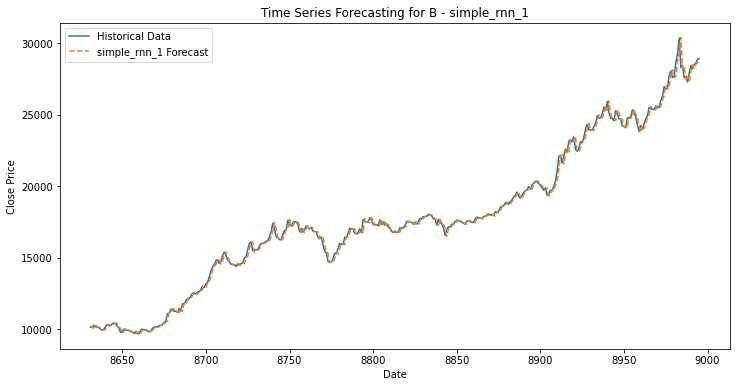

Epoch 1/50
108/108 [==============================] - 4s 14ms/step - loss: 0.0154
Epoch 2/50
108/108 [==============================] - 1s 13ms/step - loss: 1.9817e-04
Epoch 3/50
108/108 [==============================] - 1s 11ms/step - loss: 1.6596e-04
Epoch 4/50
108/108 [==============================] - 1s 13ms/step - loss: 1.5795e-04
Epoch 5/50
108/108 [==============================] - 1s 12ms/step - loss: 1.3864e-04
Epoch 6/50
108/108 [==============================] - 2s 14ms/step - loss: 1.3250e-04
Epoch 7/50
108/108 [==============================] - 1s 14ms/step - loss: 1.2699e-04
Epoch 8/50
108/108 [==============================] - 1s 13ms/step - loss: 1.1598e-04
Epoch 9/50
108/108 [==============================] - 2s 16ms/step - loss: 1.1335e-04
Epoch 10/50
108/108 [==============================] - 2s 17ms/step - loss: 1.1653e-04
Epoch 11/50
108/108 [==============================] - 2s 14ms/step - loss: 1.0908e-04
Epoch 12/50
108/108 [==============================] - 2

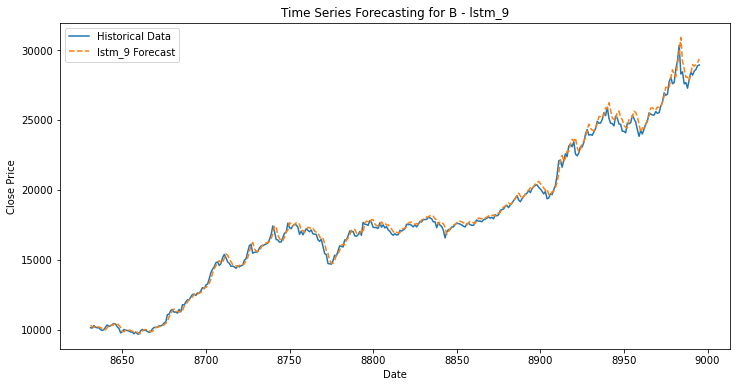

Epoch 1/50
108/108 [==============================] - 4s 12ms/step - loss: 0.0080
Epoch 2/50
108/108 [==============================] - 1s 12ms/step - loss: 7.3147e-05
Epoch 3/50
108/108 [==============================] - 1s 11ms/step - loss: 7.0177e-05
Epoch 4/50
108/108 [==============================] - 1s 12ms/step - loss: 6.4825e-05
Epoch 5/50
108/108 [==============================] - 1s 11ms/step - loss: 6.0155e-05
Epoch 6/50
108/108 [==============================] - 1s 12ms/step - loss: 5.7938e-05
Epoch 7/50
108/108 [==============================] - 1s 13ms/step - loss: 5.5482e-05
Epoch 8/50
108/108 [==============================] - 1s 11ms/step - loss: 5.4268e-05
Epoch 9/50
108/108 [==============================] - 1s 11ms/step - loss: 5.3329e-05
Epoch 10/50
108/108 [==============================] - 1s 13ms/step - loss: 5.3152e-05
Epoch 11/50
108/108 [==============================] - 1s 12ms/step - loss: 5.1506e-05
Epoch 12/50
108/108 [==============================] - 1

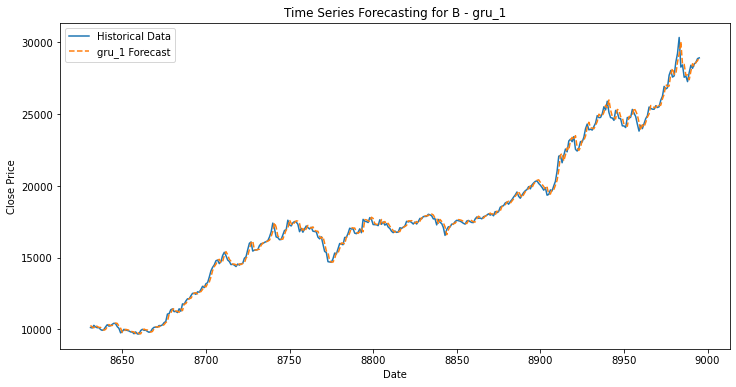

Epoch 1/50
66/66 [==============================] - 2s 7ms/step - loss: 0.0038
Epoch 2/50
66/66 [==============================] - 0s 6ms/step - loss: 6.4097e-04
Epoch 3/50
66/66 [==============================] - 0s 7ms/step - loss: 5.6054e-04
Epoch 4/50
66/66 [==============================] - 0s 7ms/step - loss: 5.5072e-04
Epoch 5/50
66/66 [==============================] - 0s 7ms/step - loss: 4.9987e-04
Epoch 6/50
66/66 [==============================] - 0s 7ms/step - loss: 4.5719e-04
Epoch 7/50
66/66 [==============================] - 0s 7ms/step - loss: 4.2639e-04
Epoch 8/50
66/66 [==============================] - 1s 8ms/step - loss: 4.0799e-04
Epoch 9/50
66/66 [==============================] - 0s 7ms/step - loss: 3.8669e-04
Epoch 10/50
66/66 [==============================] - 1s 8ms/step - loss: 3.6922e-04
Epoch 11/50
66/66 [==============================] - 1s 8ms/step - loss: 3.5785e-04
Epoch 12/50
66/66 [==============================] - 0s 7ms/step - loss: 3.6008e-04
Epoch

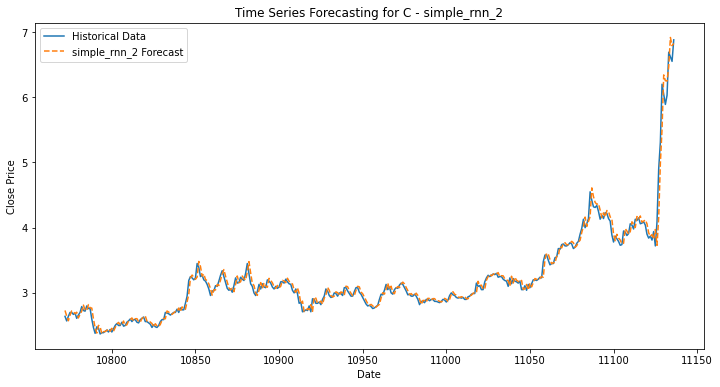

Epoch 1/50
66/66 [==============================] - 3s 14ms/step - loss: 0.0241
Epoch 2/50
66/66 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 3/50
66/66 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 4/50
66/66 [==============================] - 1s 18ms/step - loss: 9.4375e-04
Epoch 5/50
66/66 [==============================] - 1s 16ms/step - loss: 7.9519e-04
Epoch 6/50
66/66 [==============================] - 1s 18ms/step - loss: 7.2304e-04
Epoch 7/50
66/66 [==============================] - 1s 16ms/step - loss: 6.9617e-04
Epoch 8/50
66/66 [==============================] - 2s 28ms/step - loss: 6.3865e-04
Epoch 9/50
66/66 [==============================] - 2s 26ms/step - loss: 6.1921e-04
Epoch 10/50
66/66 [==============================] - 1s 18ms/step - loss: 5.7893e-04
Epoch 11/50
66/66 [==============================] - 1s 19ms/step - loss: 5.5481e-04
Epoch 12/50
66/66 [==============================] - 1s 16ms/step - loss: 5.6707e-04
E

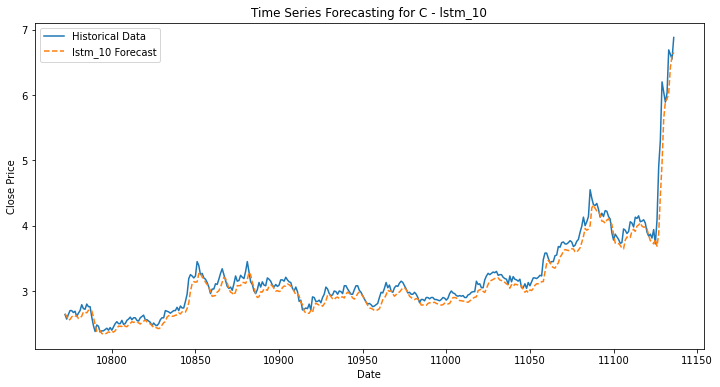

Epoch 1/50
66/66 [==============================] - 3s 14ms/step - loss: 0.0332
Epoch 2/50
66/66 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 3/50
66/66 [==============================] - 1s 15ms/step - loss: 5.7427e-04
Epoch 4/50
66/66 [==============================] - 1s 14ms/step - loss: 4.9720e-04
Epoch 5/50
66/66 [==============================] - 1s 15ms/step - loss: 4.4837e-04
Epoch 6/50
66/66 [==============================] - 1s 14ms/step - loss: 4.2443e-04
Epoch 7/50
66/66 [==============================] - 1s 14ms/step - loss: 4.0466e-04
Epoch 8/50
66/66 [==============================] - 1s 14ms/step - loss: 3.7173e-04
Epoch 9/50
66/66 [==============================] - 1s 14ms/step - loss: 4.0127e-04
Epoch 10/50
66/66 [==============================] - 1s 15ms/step - loss: 3.7302e-04
Epoch 11/50
66/66 [==============================] - 1s 14ms/step - loss: 3.5397e-04
Epoch 12/50
66/66 [==============================] - 1s 15ms/step - loss: 3.4573e-

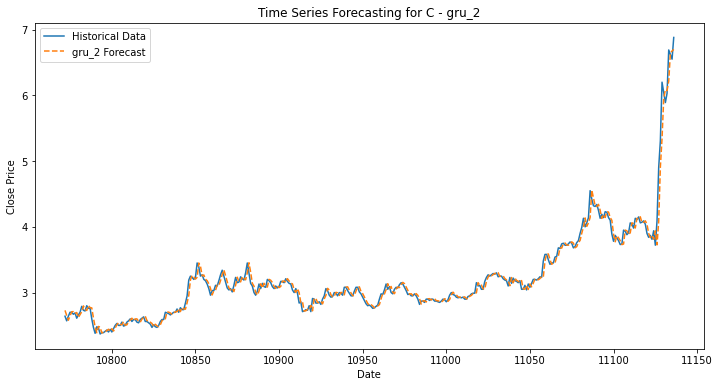

Epoch 1/50
47/47 [==============================] - 2s 5ms/step - loss: 0.0623
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 4.0822e-04
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 3.6847e-04
Epoch 4/50
47/47 [==============================] - 0s 5ms/step - loss: 3.6667e-04
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 3.9329e-04
Epoch 6/50
47/47 [==============================] - 0s 5ms/step - loss: 3.4446e-04
Epoch 7/50
47/47 [==============================] - 0s 5ms/step - loss: 6.5681e-04
Epoch 8/50
47/47 [==============================] - 0s 5ms/step - loss: 3.3662e-04
Epoch 9/50
47/47 [==============================] - 0s 5ms/step - loss: 3.3782e-04
Epoch 10/50
47/47 [==============================] - 0s 5ms/step - loss: 3.1690e-04
Epoch 11/50
47/47 [==============================] - 0s 5ms/step - loss: 3.2684e-04
Epoch 12/50
47/47 [==============================] - 0s 5ms/step - loss: 3.1548e-04
Epoch

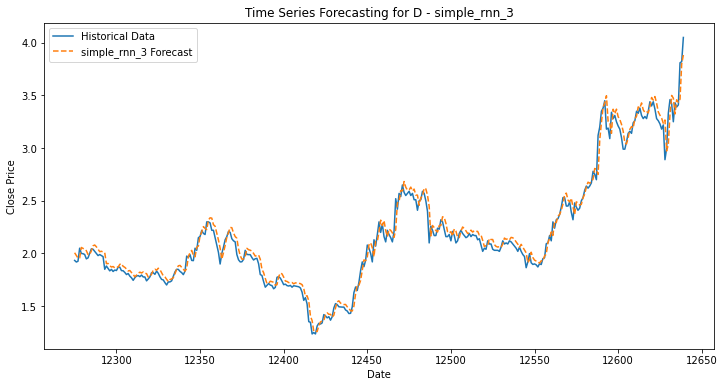

Epoch 1/50
47/47 [==============================] - 2s 12ms/step - loss: 0.1153
Epoch 2/50
47/47 [==============================] - 1s 12ms/step - loss: 0.0038
Epoch 3/50
47/47 [==============================] - 1s 13ms/step - loss: 0.0019
Epoch 4/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0015
Epoch 5/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 6/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 7/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 8/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 9/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 10/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 11/50
47/47 [==============================] - 1s 11ms/step - loss: 9.4598e-04
Epoch 12/50
47/47 [==============================] - 1s 12ms/step - loss: 8.8225e-04
Epoch 13/50
47/47 [==========

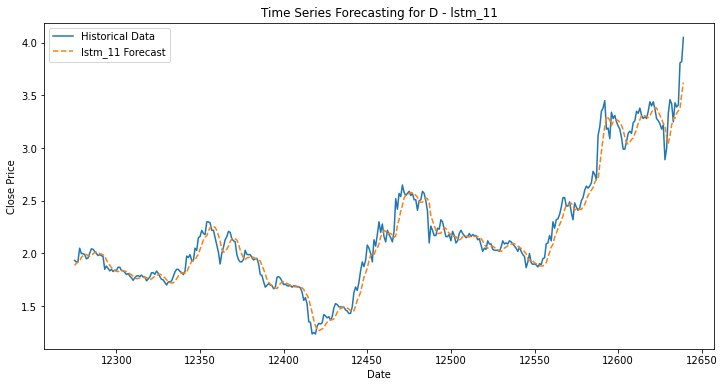

Epoch 1/50
47/47 [==============================] - 2s 12ms/step - loss: 0.1847
Epoch 2/50
47/47 [==============================] - 1s 12ms/step - loss: 0.0111
Epoch 3/50
47/47 [==============================] - 1s 12ms/step - loss: 9.7752e-04
Epoch 4/50
47/47 [==============================] - 1s 11ms/step - loss: 5.9806e-04
Epoch 5/50
47/47 [==============================] - 1s 12ms/step - loss: 5.4131e-04
Epoch 6/50
47/47 [==============================] - 1s 12ms/step - loss: 4.9241e-04
Epoch 7/50
47/47 [==============================] - 1s 12ms/step - loss: 4.7322e-04
Epoch 8/50
47/47 [==============================] - 1s 12ms/step - loss: 4.2089e-04
Epoch 9/50
47/47 [==============================] - 1s 12ms/step - loss: 4.1129e-04
Epoch 10/50
47/47 [==============================] - 1s 13ms/step - loss: 4.1263e-04
Epoch 11/50
47/47 [==============================] - 1s 12ms/step - loss: 4.4813e-04
Epoch 12/50
47/47 [==============================] - 1s 13ms/step - loss: 3.8017e-

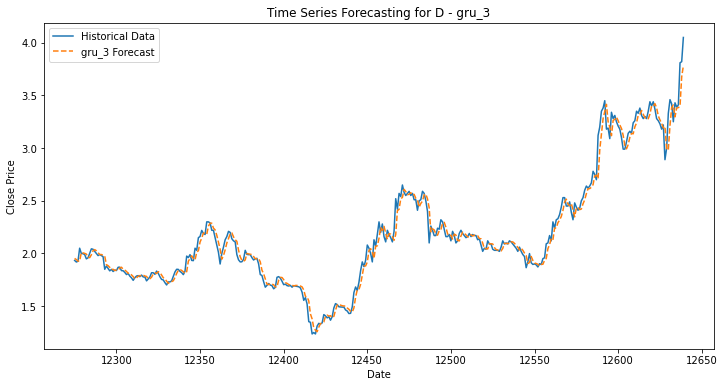

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

for company in all_data['company'].unique():
    # Filter data for the current company
    company_data = all_data[all_data['company'] == company]

    # Extract 'close' prices as a NumPy array
    prices = company_data['close'].values.reshape(-1, 1)

    # Scale the data to be between 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(prices)

    # Define a function to prepare the data for RNNs
    def prepare_data(data, time_steps):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:(i + time_steps), 0])
            y.append(data[i + time_steps, 0])
        return np.array(X), np.array(y)

    # Choose the number of time steps
    time_steps = 30  # You can adjust this based on your data characteristics

    # Prepare the data
    X, y = prepare_data(scaled_prices, time_steps)

    # Reshape the data for RNN input (samples, time_steps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Define the RNN models
    models = [
        Sequential([
            SimpleRNN(units=50, activation='relu', input_shape=(X.shape[1], 1)),
            Dense(units=1)
        ]),
        Sequential([
            LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)),
            Dense(units=1)
        ]),
        Sequential([
            GRU(units=50, activation='relu', input_shape=(X.shape[1], 1)),
            Dense(units=1)
        ])
    ]

    # Train and visualize each model
    for model in models:
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X, y, epochs=50, batch_size=32)

        # Predict the next 365 days
        forecast = model.predict(X[-365:])
        forecast = scaler.inverse_transform(forecast)

        # Visualize the results
        plt.figure(figsize=(12, 6))
        plt.plot(company_data.index[-365:], company_data['close'][-365:], label='Historical Data')
        plt.plot(company_data.index[-365:], forecast, label=f'{model.layers[0].get_config()["name"]} Forecast', linestyle='dashed')
        plt.title(f'Time Series Forecasting for {company} - {model.layers[0].get_config()["name"]}')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()
